Import and load necessities

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Data understanding

In [26]:
df=pd.read_csv('clean_resume_data.csv')

In [27]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [28]:
df.shape

(2484, 3)

In [29]:
df['Category']

0             HR
1             HR
2             HR
3             HR
4             HR
          ...   
2479    AVIATION
2480    AVIATION
2481    AVIATION
2482    AVIATION
2483    AVIATION
Name: Category, Length: 2484, dtype: object

In [30]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [31]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

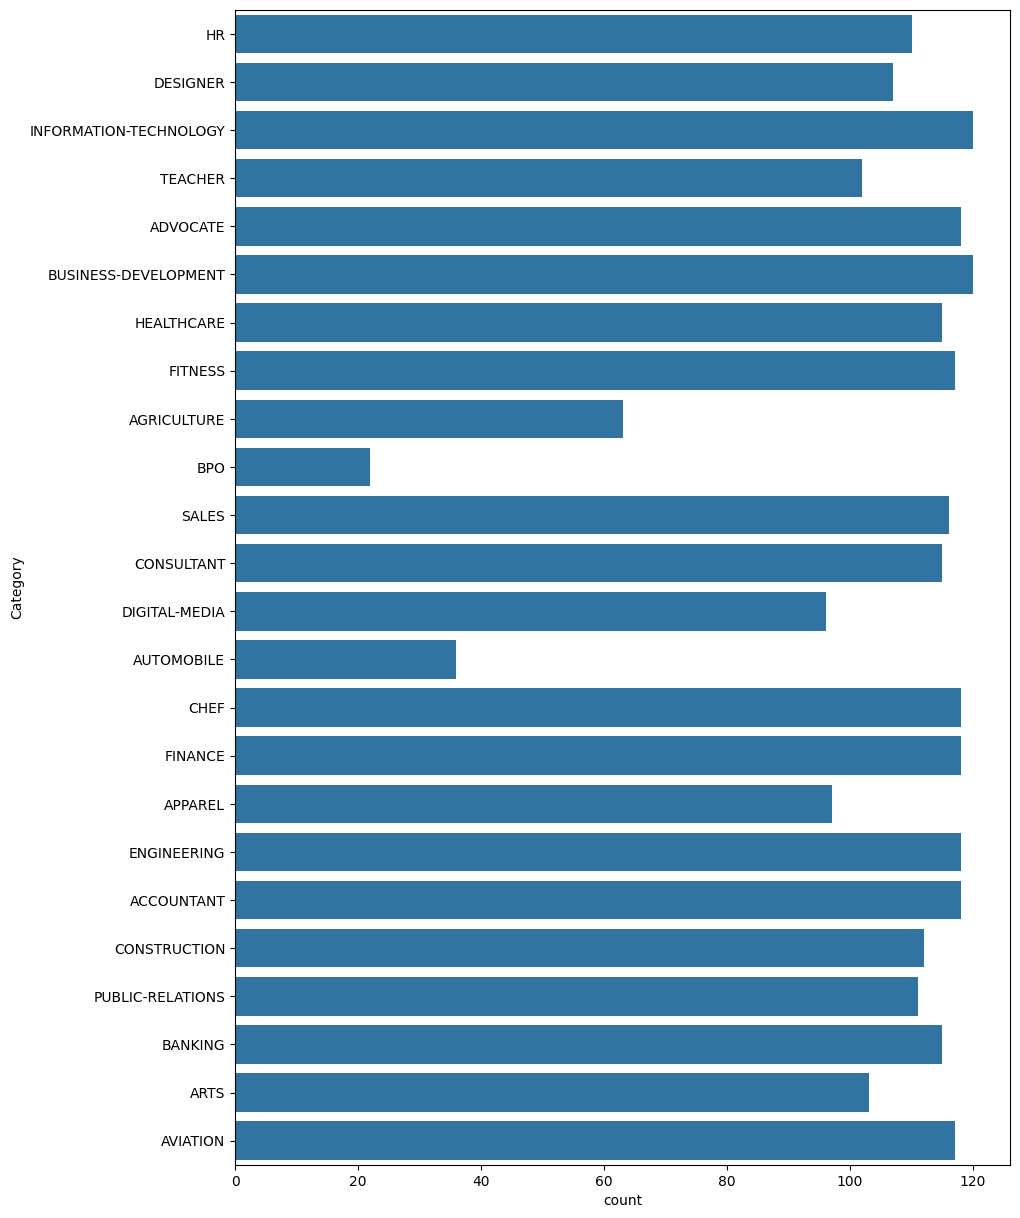

In [32]:
plt.figure(figsize=(10,15))
sns.countplot(df['Category'])
plt.show()

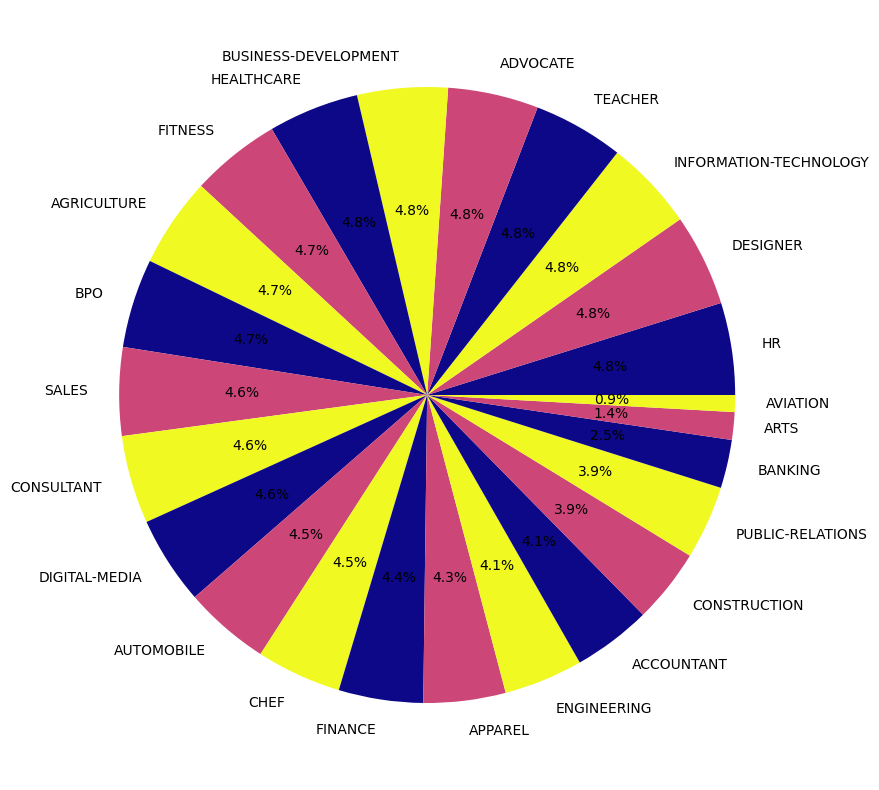

In [33]:
counts= df['Category'].value_counts()
labels= df['Category'].unique()
plt.figure(figsize=(10,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=False,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

Balancing Data(Resampling)

In [34]:
from sklearn.utils import resample

#Find maximum count of the category and store in max_count
max_count = df['Category'].value_counts().max()

#Logic to resample each category and match its count with the max_count
balanced_data = []  #This is a list created to 

for category in df['Category'].unique():  #Iterate through each unique category
    category_data = df[df['Category'] == category]  #Stores the similar category data together
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [35]:
#Check for null values and remove it
balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

Train Test Split

In [36]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

Term Frequency - Inverse Document Frequency TF-IDF (encoding)

In [37]:
tfidf_vectorizer =TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 179711 stored elements and shape (576, 29780)>

In [38]:
#Training model using Random Forest Classifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf , y_train)
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy )

Accuracy: 0.8576388888888888


In [39]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       0.95      0.72      0.82        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.90      0.86      0.88        21
                  ARTS       1.00      0.77      0.87        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      1.00      0.97        30
               BANKING       1.00      0.74      0.85        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.67      0.67      0.67        18
                  CHEF       0.80      1.00      0.89        28
          CONSTRUCTION       0.83      1.00      0.91        25
            CONSULTANT       0.96      0.71      0.81        31
              DESIGNER       0.92      0.86      0.89        28
         DIGITAL-MEDIA       0.79      

In [40]:
#Confusion Matrix
c_matrix = confusion_matrix(y_test , y_pred)
print(c_matrix)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  3  0  0  1  1]
 [ 0  1 18  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0  1]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0 17  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0  1]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  3  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  3  1  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  1 22  0  0  1  0  0  1  2  1  1  0  0]
 [ 0  0  0  0  0  0  1  0

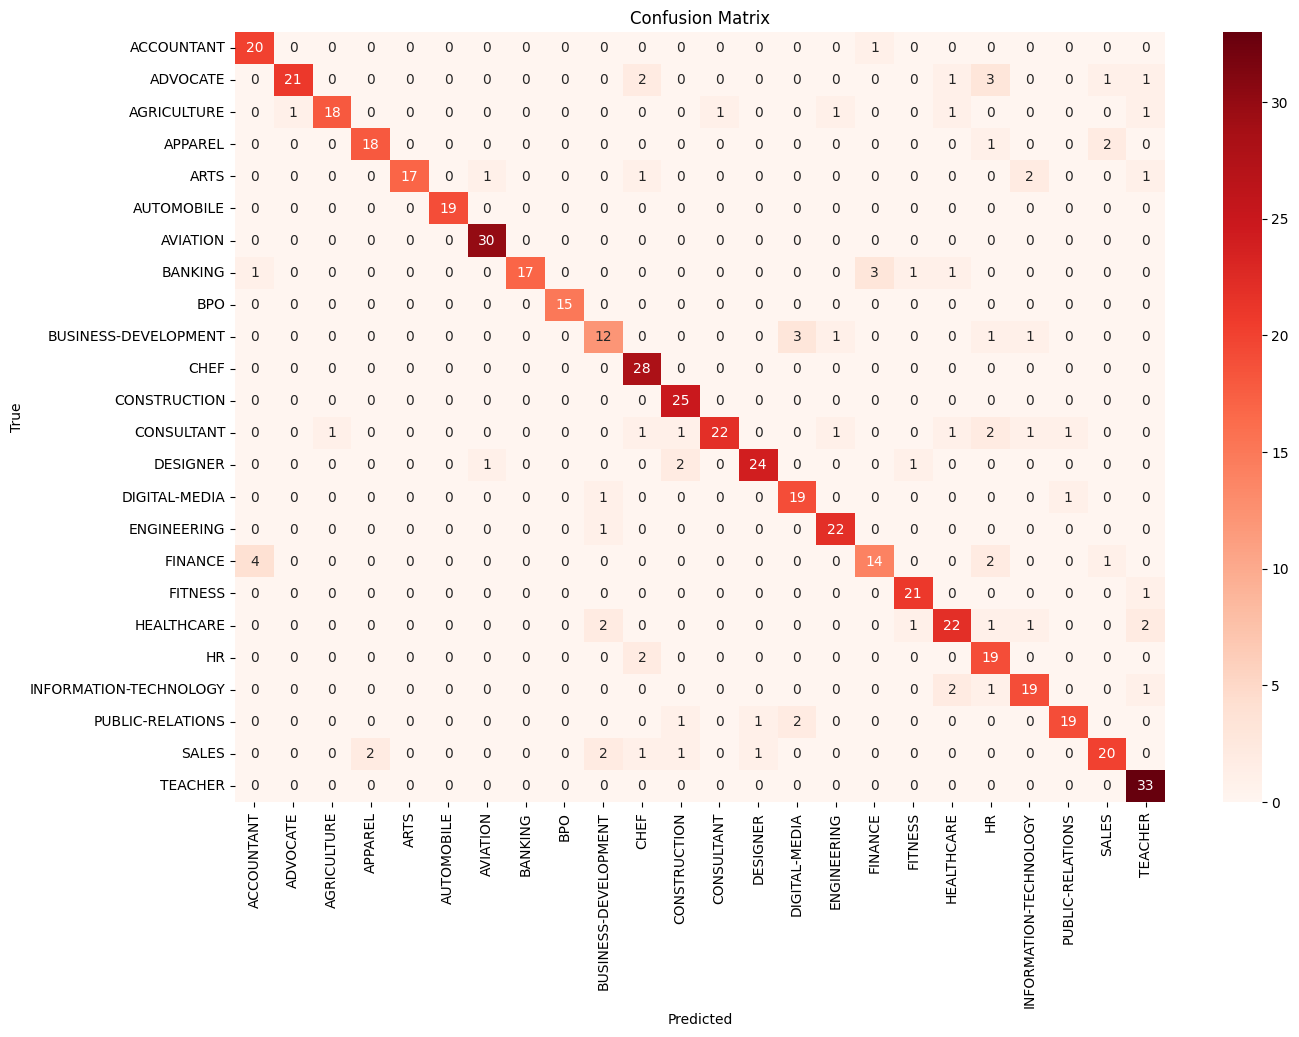

In [41]:
#heat map for confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(c_matrix , annot=True, fmt='d' , cmap='Reds' , xticklabels= rf_classifier.classes_ , yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Predictive System


In [42]:
#If you have ome unneccesary words in resume then cleaning process is necessary
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)   #urls
    cleanText = re.sub('RT|cc', ' ', cleanText)  #rt and cc used in emails
    cleanText = re.sub('#\S+\s', ' ', cleanText)   #hashtags
    cleanText = re.sub('@\S+', '  ', cleanText)  #mentions(@)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  #This line removes a wide range of special characters using a character class ([]).
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) #non-ascii value
    cleanText = re.sub('\s+', ' ', cleanText)  #removes sequence of white spaces
    return cleanText


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_5060\4227387686.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)   #urls
C:\Users\User\AppData\Local\Temp\ipykernel_5060\4227387686.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)   #hashtags
C:\Users\User\AppData\Local\Temp\ipykernel_5060\4227387686.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)  #mentions(@)


In [43]:
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf =tfidf_vectorizer.transform([resume_text])
    predicted_category =rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [44]:
resume_file = """I am innovative person"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


Saving the model

In [48]:
import pickle

In [49]:
import os

# Define the directory path
model_dir = 'Resume_Model'

# Check if the directory exists, and if not, create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Now, your original code to save the models will work
pickle.dump(rf_classifier, open(os.path.join(model_dir, 'rf_classifier_categorization.pkl'), 'wb'))
pickle.dump(tfidf_vectorizer, open(os.path.join(model_dir, 'tfidf_vectorizer_categorization.pkl'), 'wb'))

In [50]:
pickle.dump(rf_classifier,open('Resume_Model/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('Resume_Model/tfidf_vectorizer_categorization.pkl','wb'))